# **Fuel Efficiency Prediction - Linear Regression 🚗**

# Project Flow Summary 🔄
* Introduction
* Dataset overview
* Loading necessary libraries
* Loading dataset
* Data Cleaning & Preprocessing
* Exploratory Data Analysis (EDA)
* Model Building: Linear Regression
* Model Evaluation
* Conclusion


# **Introduction**
Fuel efficiency has long been a critical factor in automotive design, both for economic and environmental reasons. With rising fuel costs and growing concerns about carbon emissions, the ability to accurately predict a vehicle's fuel efficiency is more valuable than ever.

In this project, we use the classic [Auto MPG dataset](http://archive.ics.uci.edu/dataset/9/auto+mpg), a well-known dataset from the UCI Machine Learning Repository, to build a predictive model for miles per gallon (MPG) — a standard measure of fuel efficiency. The dataset includes various vehicle attributes such as cylinders, displacement, horsepower, weight, acceleration, and model year, all of which potentially influence a car’s MPG.

Our primary goal is to explore and analyze this dataset and then apply Linear Regression to predict fuel efficiency based on the available features. By the end of this notebook, we aim to develop a reliable regression model and gain insights into which vehicle characteristics most strongly affect fuel economy⛽

# **Dataset Overview📊**

The Auto MPG dataset consists of data collected from various car models built in the 1970s and early 1980s. It contains 398 instances with the following key attributes:

**mpg**: Miles per gallon (target variable)

**cylinders**: Number of cylinders in the engine

**displacement**: Engine displacement (in cubic inches)

**horsepower**: Engine horsepower

**weight**: Vehicle weight (in pounds)

**acceleration**: Time to accelerate from 0 to 60 mph (in seconds)

**model year**: Year of manufacture

**origin**: Origin of the car (1: USA, 2: Europe, 3: Asia)

**car name**: String identifier (not used in modeling)

# **Loading necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# **Loading dataset**

The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/9/auto+mpg).

I have already downloaded the dataset. Also uploaded for ref.

In [2]:
df=pd.read_csv('/content/auto-mpg.csv')

In [3]:
#Display the first few rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#Display the last few rows
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


# **Data Cleaning & Preprocessing**

In [5]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [6]:
#Removing the car name column
df=df.drop(columns='car name', axis=1)

In [7]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [8]:
#View the shape of the dataframe
df.shape

(398, 8)

Checking for columns for non-numeric datatypes:

In [9]:
#Checking the datatypes
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
model year,int64
origin,int64


In [10]:
#Highlight the column with non-numeric data
df.select_dtypes(exclude='number').columns

Index(['horsepower'], dtype='object')

In [11]:
#Converting the horsepower into numeric datatype
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce') #Convert the non numeric data into NaN
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)#Filling the NaN values with median values
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model year,int64
origin,int64


Checking any missing values:

In [12]:
#Checking for missing values
df.isna().sum()
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0


# **Exploratory Data Analysis (EDA)**

Plotting Histograms:

array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'model year'}>,
        <Axes: title={'center': 'origin'}>, <Axes: >]], dtype=object)

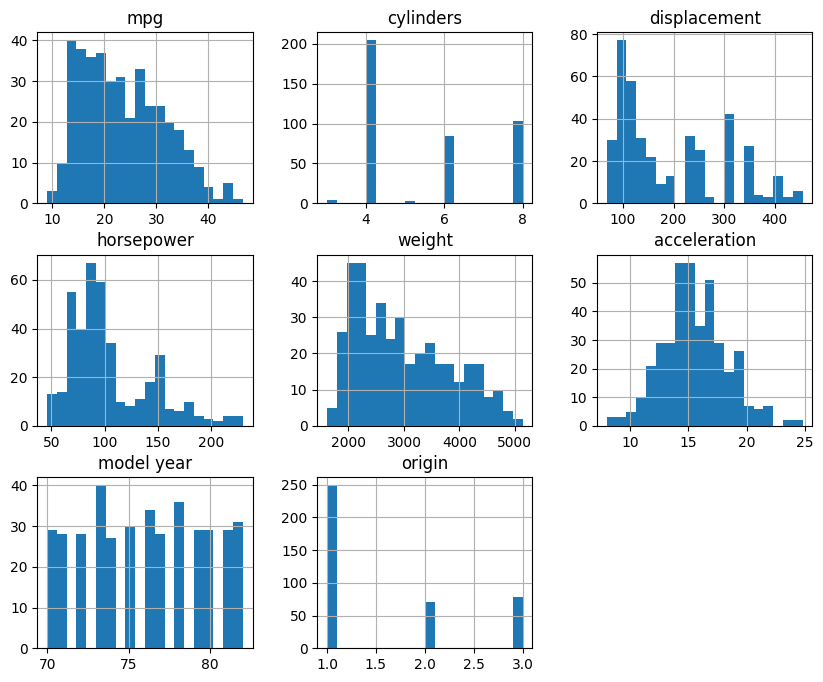

In [13]:
df.hist(figsize=(10, 8), bins=20)

Plotting Heatmap to find correlations:

<Axes: >

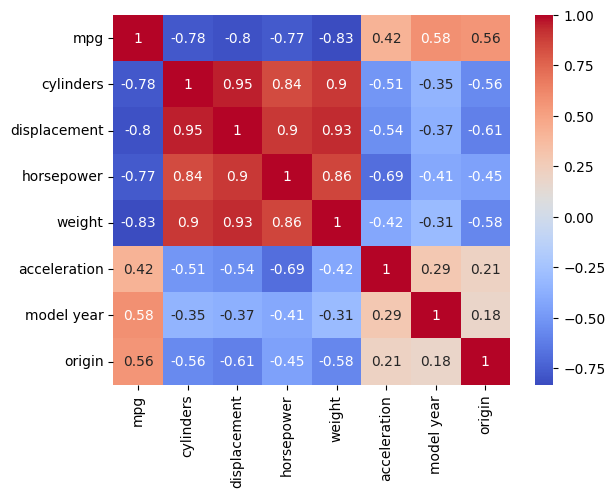

In [14]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# **Model Building: Linear Regression**

Import LR model libraries:

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Split the dataset into train & test:

In [16]:
X = df.drop(columns=['mpg'])
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr=LinearRegression()

In [18]:
lr.fit(X_train, y_train)

LinearRegression()

# **Model Evaluation**

In [19]:
y_pred_lr = lr.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [21]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Mean Squared Error: {mse_lr}')
print(f'Root Mean Squared Error: {rmse_lr}')
print(f'R-squared: {r2_lr}')

Mean Squared Error: 8.197746885824987
Root Mean Squared Error: 2.8631707748272697
R-squared: 0.8475304239212402


In [22]:
def plot_pred_vs_actual(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Predicted vs. Actual Values')
    plt.show()

Plot the graph b/w Predicted & Actual Values:

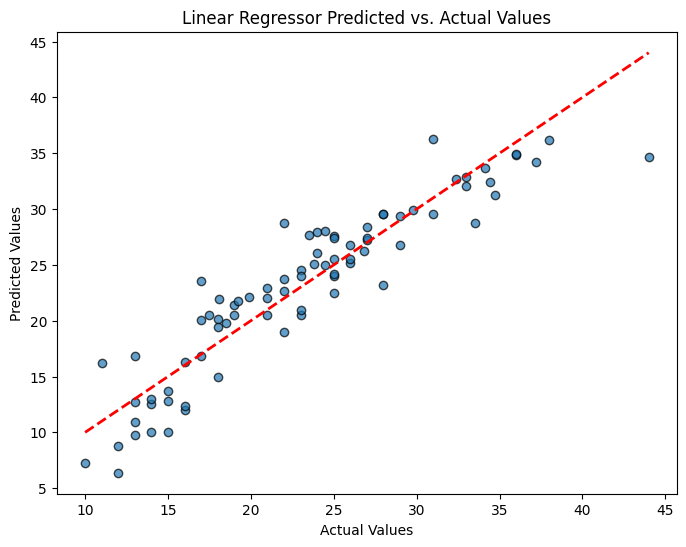

In [23]:
plot_pred_vs_actual(y_test, y_pred_lr, 'Linear Regressor')

# **Conclusion**

The Linear Regression model was trained to predict fuel efficiency (MPG) using features from the Auto MPG dataset.

The model achieved the following performance metrics:

* Mean Squared Error (MSE): 8.20

* R-squared (R²): 0.85

* Root Mean Squared Error (RMSE): ≈ 2.86

These metrics indicate that the model is performing well, capturing **about 85% of the variance** in the target variable and maintaining a low average prediction error.

Visual Interpretation (Actual vs. Predicted Plot)📈
* The scatter plot comparing predicted vs. actual MPG values shows a strong linear trend along the 45-degree red line.

* Most predictions closely follow the ideal line, indicating that the model is making **accurate and consistent predictions**.

* Minor deviations are observed, but no major outliers or systematic bias are present.

**Next steps/Suggesstions :**

* Explore using other regularized models (e.g., Ridge, Lasso) to handle multicollinearity and potentially improve performance further.

* Experiment with non-linear models (e.g., Random Forest, Gradient Boosting) to capture complex patterns missed by linear regression.

* Fine-tune the feature set by removing highly correlated or less impactful features to simplify the model.